In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing


In [2]:
(x_train_set, y_train_set), (x_test, y_test) = boston_housing. load_data()
print(x_train_set.shape,  y_train_set.shape,  x_test.shape,  y_test. shape)


57026/57026 [==============================] - 0s 1us/step
(404, 13) (404,) (102, 13) (102,)


In [3]:
#Split data
from sklearn. model_selection import train_test_split

#預設 test_size=0.25
x_train, x_valid, y_train, y_valid = train_test_split(x_train_set, y_train_set, random_state=1)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(303, 13) (101, 13) (303,) (101,)


In [4]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

scal = StandardScaler ()
x_train = scal.fit_transform(x_train)
x_valid = scal.transform(x_valid)#不需要fit 
x_test = scal. transform(x_test)

In [5]:
# Build Model
import tensorflow as tf
from tensorflow import keras 
from tensorflow. keras.models import Sequential 
from tensorflow.keras.layers import Dense #建構隱藏層
from tensorflow.keras.optimizers import SGD #優化器


In [6]:
keras.backend.clear_session ()#把先前做過的設定清除
np. random. seed (1)
tf.random. set_seed (1)

In [7]:
model = Sequential ()
#units：本層的神經元數 / input_shape：inputlayer data 神經元(特徵數)，不含bias
model.add(Dense (units=100, activation='relu', input_shape=x_train. shape [1:])) 
model.add(Dense(units=50, activation='relu' ))
model.add(Dense(units=1))#輸出層

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


In [10]:
#(get weights and bias)
weights, biases = model.layers[1].get_weights()#指dense_1 

print(biases.shape,"\n" ,biases)
print()
print(weights.shape,"\n" ,weights)

(50,) 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

(100, 50) 
 [[ 0.14266683  0.00440931  0.13019253 ...  0.19365115 -0.1843884
  -0.03926277]
 [ 0.12202959 -0.17028598 -0.09062948 ... -0.12935147 -0.18875937
   0.04145107]
 [-0.01559862  0.07447113  0.08824493 ...  0.0141283  -0.13705403
   0.12401952]
 ...
 [-0.06894441  0.06670509  0.05574356 ... -0.01663093  0.03572373
  -0.17696862]
 [ 0.13332467 -0.18060927 -0.15837593 ...  0.11280765 -0.12049828
   0.01523967]
 [-0.01597056 -0.02270646 -0.03014131 ... -0.12528653  0.19690062
  -0.0472649 ]]


In [11]:
#Compile
model.compile (loss='mse', optimizer=SGD(learning_rate=1e-3))
#隨機梯度下降法，0.001
model

In [12]:
#Train
train = model.fit(x_train, y_train, epochs=20, 
                  validation_data=(x_valid, y_valid))#預設 batch_size=32
# 303/32-->分10份，執行 20次

Epoch 1/20
10/10 [==============================] - 1s 16ms/step - loss: 535.3179 - val_loss: 415.1325
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 239.7568 - val_loss: 70.4771
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 44.0354 - val_loss: 33.6373
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 26.9653 - val_loss: 24.5690
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 21.7369 - val_loss: 20.0383
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 19.3773 - val_loss: 18.2425
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 17.7132 - val_loss: 16.8129
Epoch 8/20
10/10 [==============================] - 0s 4ms/step - loss: 16.4851 - val_loss: 15.9407
Epoch 9/20
10/10 [==============================] - 0s 4ms/step - loss: 15.3869 - val_loss: 14.8105
Epoch 10/20
10/10 [==============================] - 0s 5ms/step - loss: 14.1544 - val_loss: 13.

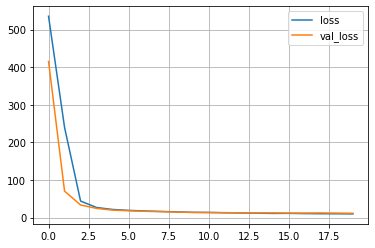

In [13]:
pd.DataFrame (train.history).plot () 
plt.grid(True) 
plt. show()

In [14]:
#Evaluate
model.evaluate(x_test, y_test)
#x_test：102
#102/32＝4

4/4 [==============================] - 0s 1ms/step - loss: 22.0752


22.075185775756836

In [15]:
# Predict
print(model.predict(x_test [:3]))
print()
print(y_test[:3])

1/1 [==============================] - 0s 119ms/step
[[ 7.330777]
 [16.370192]
 [21.577837]]

[ 7.2 18.8 19. ]
